# Getting started with the Antarctica region

Antarctica has the bad idea to be located at the South Pole, which makes the mapping of this region a bit different than what we've learned so far. However, as you will see, it's not very difficult and the change is minimal.

First, the imports. They are the same as always, but I removed the figure size defaults:

In [1]:
# Display the plots in the notebook:
%matplotlib inline
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are to ignore certain warnings.
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

### Read and select the regional data

Reading the data works as allways:

In [2]:
ds = xr.open_dataset('../ERA-Int-Invariant.nc')

To select the data for a specific region, we will use xray's ``sel`` function as we learned it in the exercises. For now, we will select the data below 60° south, but you are free to make the domain bigger if you find it useful for your analyses:

In [3]:
ds = ds.sel(latitude=slice(-60, -90))

Read the variable:

In [4]:
z = ds.z / 9.81

### Plot the data

Until now, nothing special in comparison to other regions of the world. It's for the *plotting* that things become a bit more complicated. Let's do it the "usual" way:

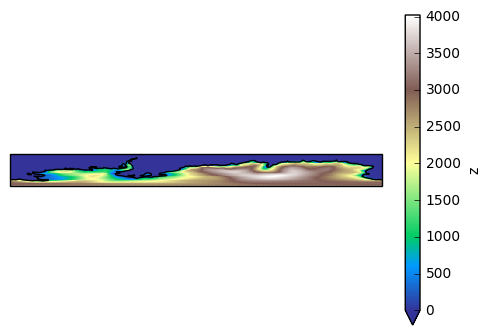

In [5]:
# Try a regional plot as usual
ax = plt.axes(projection=ccrs.PlateCarree())
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines();  # Add coastlines to the plot

OK. Not very useful. We will now use a better projection:

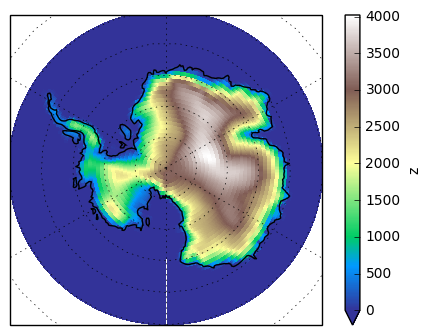

In [6]:
# The new projection:
ax = plt.axes(projection=ccrs.SouthPolarStereo())
# Limit the map to -60 degrees latitude and below:
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
# Plot the data as usual
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
# Add details to the plot:
ax.coastlines();
ax.gridlines();

Looks better now!

### Change some details 

The plot above looks fine for me. If you want you can change some details for it, starting with its size:

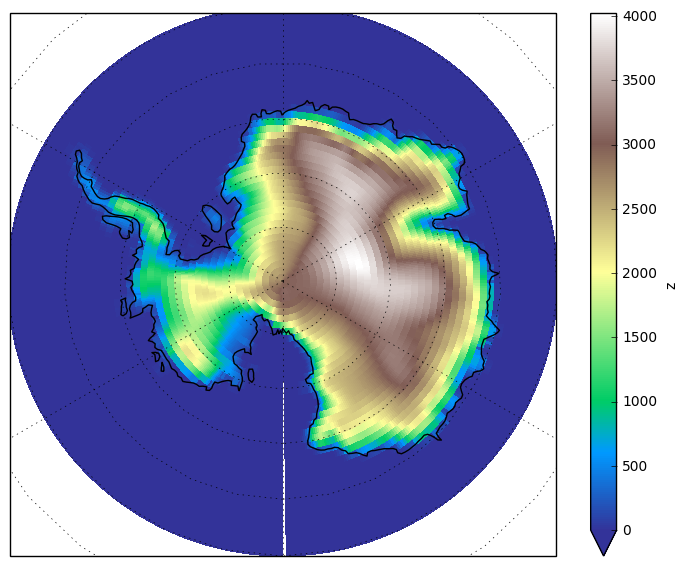

In [7]:
# Prepare the figure with the wanted size:
fig = plt.figure(figsize=(9, 7))
# The rest doesn't change:
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines();
ax.gridlines();

If you want, you can also make a circular plot instead of the quadratic one. First, you'll have to run these few lines (only once for the notebook!):

In [8]:
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

And then add one line to the plot commands:

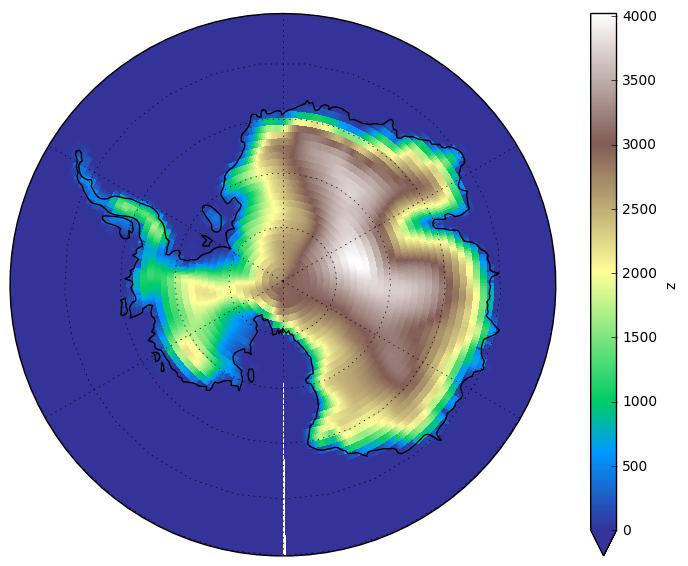

In [9]:
# This did not change:
fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
# Add the following line:
ax.set_boundary(map_circle, transform=ax.transAxes)
# This did not change either:
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain') 
ax.coastlines();
ax.gridlines();

**OK, you should be good now!**

### Tired of writing so many lines?

Note that it is possible to simplify your plotting commands by writing a **function**. We did not cover this during the course but it is quite easy. Let's write the following function:

In [10]:
def prepare_plot():
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=(9, 7))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    ax.coastlines(); ax.gridlines();
    return fig, ax

Now, making a plot has become even easier:

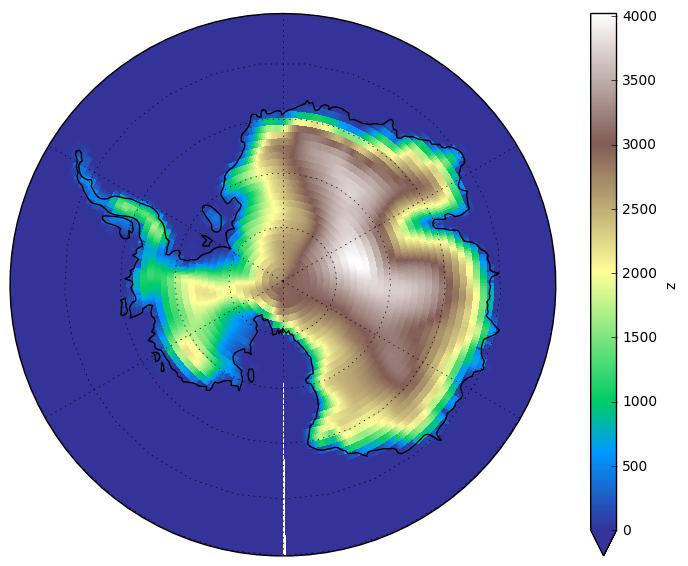

In [11]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');

### Need to save the plot for your presentation?

**The easiest way is to use "right-click -> save as" on the image in the notebook.**

Also, you can save the plot as pdf or png quite easily (examples below). But this might look quite different as the picture on screen sometimes...

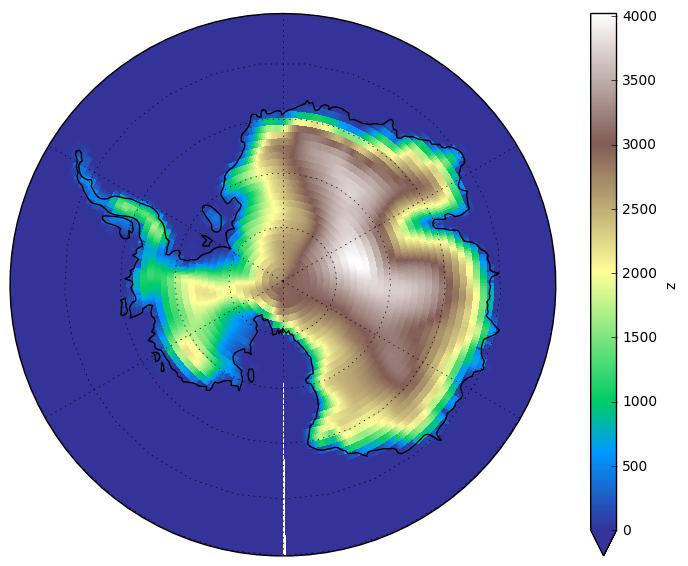

In [12]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');
plt.savefig('topo.pdf')

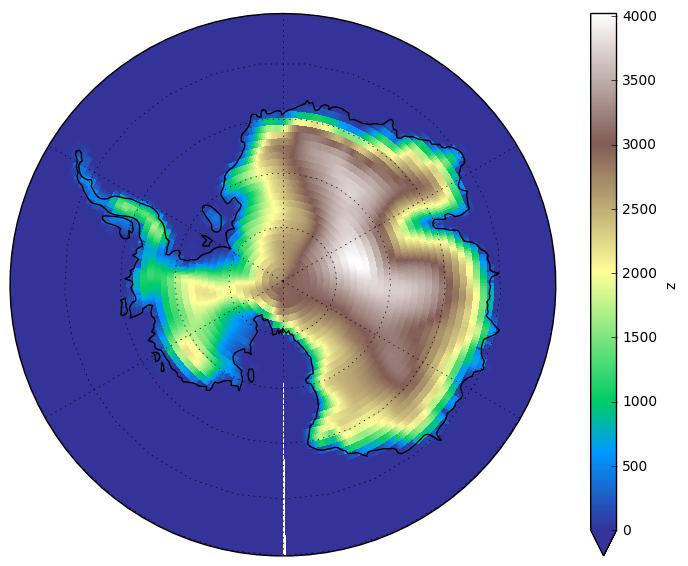

In [13]:
fig, ax = prepare_plot()
z.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');
plt.savefig('topo.png')

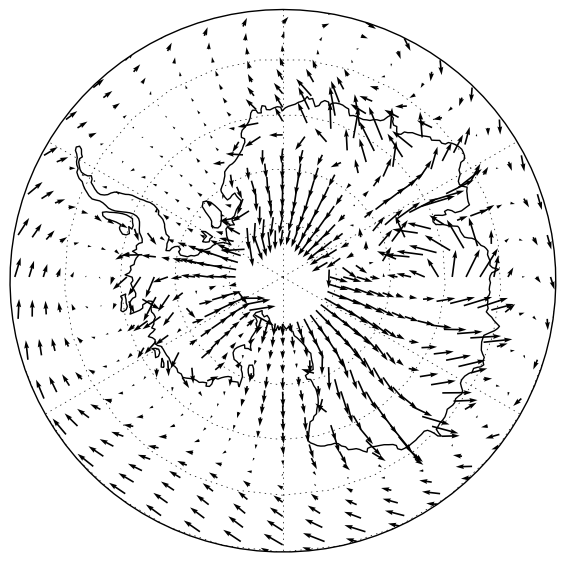

In [60]:
ds = xr.open_dataset('../ERA-Int-MonthlyAvg-UVSLP.nc')
u_avg = ds.u10.isel(month=1)
v_avg = ds.v10.isel(month=1)
fig, ax = prepare_plot()
pu, pv = u_avg[1:-7:2,::12], v_avg[1:-7:2,::12]
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree(), 
               scale=150, width=0.003)

In [17]:
pu

<xarray.DataArray 'u10' (latitude: 35, longitude: 69)>
array([[ 0.6667837 ,  0.72866359,  0.78752907, ...,  0.4635599 ,
         0.54737151,  0.62490034],
       [ 0.89300422,  0.99199738,  1.06592182, ...,  0.65663931,
         0.7677416 ,  0.84921194],
       [ 0.26029232,  0.29911639,  0.34687207, ...,  0.15463438,
         0.20914678,  0.23635099],
       ..., 
       [ 0.3595438 , -0.3701221 , -0.86403385, ...,  3.35195669,
         2.01751865,  0.84610777],
       [-0.53771138, -2.41882556, -3.42527083, ...,  2.05364353,
         1.637404  ,  0.52119618],
       [ 0.65258287,  0.46397146,  0.27318187, ...,  1.19092613,
         0.96505915,  0.76472609]])
Coordinates:
  * longitude  (longitude) float32 -179.25 -174.0 -168.75 -163.5 -158.25 ...
  * latitude   (latitude) float32 89.25 84.0 78.75 73.5 68.25 63.0 57.75 ...